# Early Detection of Chronic Kidney Disease Using Machine Learning Techniques

## K-Nearest Neighbors

In [1]:
import pandas as ckd_pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as CKD_plot
import seaborn as CKD_seaborn
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
ckd_DataFrame = ckd_pd.read_csv('CKD_Preprocessed.csv')
ckd_DataFrame

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCells,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,76.0,...,38.0,6000.0,4.1,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,2.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [3]:
ind_features = ckd_DataFrame.drop(columns = ["class"],axis =1)
X = ind_features


In [4]:
dep_features = ckd_DataFrame['class']
y = dep_features

In [5]:
Counter(y)

Counter({0: 250, 1: 150})

In [6]:
#performing Synthetic Minority Over-sampling Technique (SMOTE) to balance dataset.
smoteKnn = SMOTE(random_state=5)
newSampledValue_x, newSampledValue_y = smoteKnn.fit_resample(X, y)
X = newSampledValue_x
y = newSampledValue_y
Counter(newSampledValue_y)

Counter({0: 250, 1: 250})

In [7]:
ckd_X_trainValue, ckd_X_textValue, ckd_y_trainValue, ckd_y_textValue = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [8]:
#model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score

classifierKnn = KNeighborsClassifier(n_neighbors=5)
classifierKnn.fit(ckd_X_trainValue, ckd_y_trainValue)

predictedValue_y = classifierKnn.predict(ckd_X_textValue)
knn_accuracy = accuracy_score(ckd_y_textValue, predictedValue_y)

print(f"Accuracy of Train KNN is {accuracy_score(ckd_y_trainValue, classifierKnn.predict(ckd_X_trainValue))}")
print(f"Accuracy of Test KNN is {knn_accuracy} \n")
cm =confusion_matrix(ckd_y_textValue, classifierKnn.predict(ckd_X_textValue))
print(cm)
class_report = classification_report(ckd_y_textValue, predictedValue_y)

Accuracy of Train KNN is 0.8293333333333334
Accuracy of Test KNN is 0.792 

[[44 19]
 [ 7 55]]


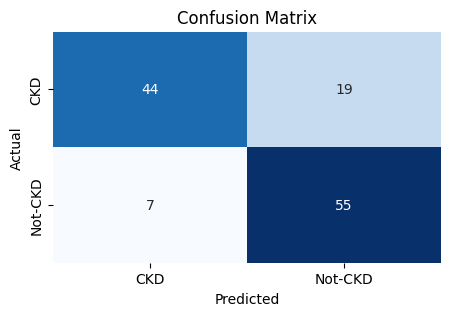

In [9]:
CKD_plot.figure(figsize=(5, 3))
CKD_seaborn.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['CKD', 'Not-CKD'], yticklabels=['CKD', 'Not-CKD'])
CKD_plot.title('Confusion Matrix')
CKD_plot.xlabel('Predicted')
CKD_plot.ylabel('Actual')
CKD_plot.show()

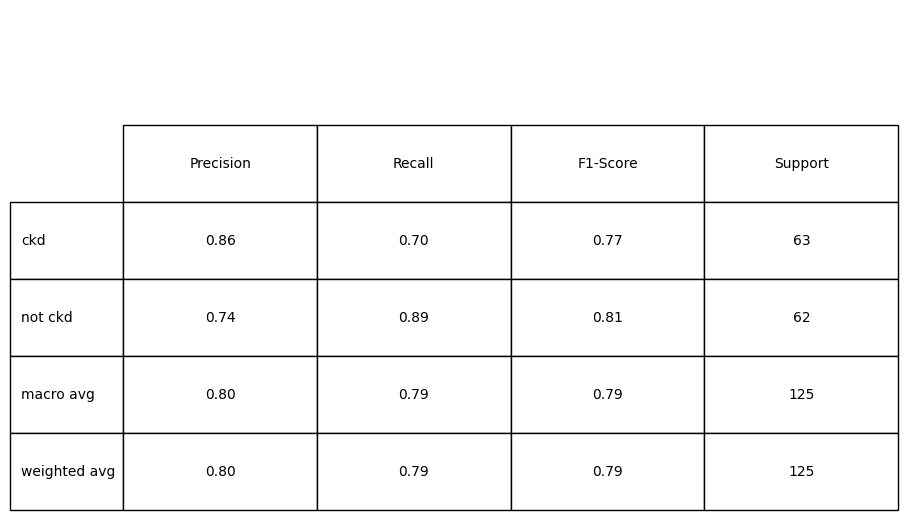

In [10]:
dataLines = class_report.split('\n')
classes = ['ckd','not ckd','macro avg','weighted avg']
table_data = []

for line in dataLines[2:]:
    if line.strip() and not line.strip().startswith(('accuracy')):  # Check if the line is not empty
        t = line.split()
        v = []
        for x in t[1:]:
            if (x != 'avg'):
                v.append(x)
        table_data.append(v)
table_data

fig, knn_ax = CKD_plot.subplots(figsize=(10, 5))
knn_ax.axis('off')

knn_ax.table(cellText=table_data, colLabels=['Precision', 'Recall', 'F1-Score', 'Support'],
         rowLabels=classes, cellLoc='center', loc='top',
         bbox=[0, -0.3, 1, 1])
CKD_plot.show()

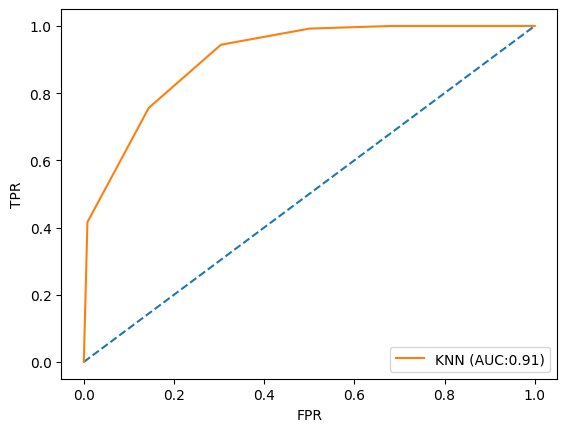

In [11]:
# plotting the area under the Receiver Operating Characteristic (ROC) curve
prob_value = classifierKnn.predict_proba(X)[:,1]
auc_KNN = roc_auc_score(y,prob_value)

fpr,tpr, threshold =  roc_curve(y,prob_value)
CKD_plot.plot([0,1],[0,1], linestyle = '--')
CKD_plot.plot(fpr,tpr,label = '%s (AUC:%0.2f)'  % ('KNN', auc_KNN))
CKD_plot.xlabel('FPR')
CKD_plot.ylabel('TPR')
CKD_plot.legend( loc='lower right')
CKD_plot.show()